In [1]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_


selector.ranking_

array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [2]:
selector.support_


array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [4]:
y

array([17.2134918 , 19.37965436, 14.75030901, 11.81662128,  9.45520588,
       13.90806032,  3.40447398, 24.20228984, 17.5783377 , 17.51556532,
       17.40999895, 17.11893656, 21.81510702, 15.88623898, 21.63246599,
       13.01689624, 22.908266  ,  6.84202611, 10.32969753, 17.70617001,
        8.52251585,  9.51592807, 19.81663198,  2.99416378,  8.04688453,
       22.09060713, 18.07976383, 15.64717616,  9.18985112,  8.10886643,
       11.46237964, 11.27510587,  9.39472899, 19.12963765,  6.75303583,
        8.59450992, 14.08547252, 15.47556192, 23.37684908, 10.65602456,
       26.21981092,  7.56662861,  6.09081028, 15.3507226 , 13.30251573,
       15.05111884, 12.18062778, 23.69853054,  7.89988206, 14.86941989])

Optimal number of features : 3


C:\Users\301054\Anaconda3\envs\AIMicroServices\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


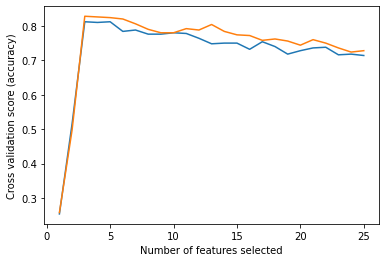

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [3]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


In [1]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
Y = data.target

clf = RandomForestClassifier()

estimators = [('standardize' , StandardScaler()),
             ('rfecv', RFECV(estimator=clf, scoring='accuracy'))]

pipeline = Pipeline(estimators)

ranking_features = pipeline.named_steps['rfecv'].ranking_
print (ranking_features)

AttributeError: 'RFECV' object has no attribute 'ranking_'

In [2]:
from sklearn import set_config

set_config(print_changed_only=True)


from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.pipeline import Pipeline

X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfecv_model = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfecv_model), ('m', model)])

# make balanced scorer
scorer = make_scorer(balanced_accuracy_score)

# evaluate model
cv = TimeSeriesSplit(n_splits=3)
result = cross_validate(pipeline, X, y, scoring=scorer,
                          cv=cv, return_estimator=True)

In [3]:
result

{'fit_time': array([0.08530235, 0.10070014, 0.13264489]),
 'score_time': array([0.00099683, 0.        , 0.00096655]),
 'estimator': [Pipeline(steps=[('s', RFECV(estimator=DecisionTreeClassifier())),
                  ('m', DecisionTreeClassifier())]),
  Pipeline(steps=[('s', RFECV(estimator=DecisionTreeClassifier())),
                  ('m', DecisionTreeClassifier())]),
  Pipeline(steps=[('s', RFECV(estimator=DecisionTreeClassifier())),
                  ('m', DecisionTreeClassifier())])],
 'test_score': array([0.808     , 0.83602202, 0.86648309])}

In [4]:
for iter, pipe in enumerate(result['estimator']):
    print(f'Iteration no: {iter}')
    for i in range(X.shape[1]):
        print('Column: %d, Selected %s, Rank: %d' %
            (i, pipe['s'].support_[i], pipe['s'].ranking_[i]))

Iteration no: 0
Column: 0, Selected False, Rank: 2
Column: 1, Selected True, Rank: 1
Column: 2, Selected True, Rank: 1
Column: 3, Selected True, Rank: 1
Column: 4, Selected True, Rank: 1
Column: 5, Selected True, Rank: 1
Column: 6, Selected True, Rank: 1
Column: 7, Selected True, Rank: 1
Column: 8, Selected True, Rank: 1
Column: 9, Selected True, Rank: 1
Iteration no: 1
Column: 0, Selected False, Rank: 2
Column: 1, Selected False, Rank: 4
Column: 2, Selected True, Rank: 1
Column: 3, Selected True, Rank: 1
Column: 4, Selected False, Rank: 3
Column: 5, Selected False, Rank: 6
Column: 6, Selected True, Rank: 1
Column: 7, Selected False, Rank: 5
Column: 8, Selected True, Rank: 1
Column: 9, Selected False, Rank: 7
Iteration no: 2
Column: 0, Selected False, Rank: 2
Column: 1, Selected False, Rank: 5
Column: 2, Selected True, Rank: 1
Column: 3, Selected True, Rank: 1
Column: 4, Selected True, Rank: 1
Column: 5, Selected False, Rank: 4
Column: 6, Selected True, Rank: 1
Column: 7, Selected Fals